# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


###  Import Statements


In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [86]:
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.figsize'] = [18, 6]

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(2000, 96)

2000 rows and 96 columns

In [7]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [8]:
df_data.duplicated().values.any()

True

In [9]:
df_data.drop_duplicates(inplace=True)

In [12]:
df_data.isna().values.any()

True

In [111]:
df_data.isna().values.any()

True

There are missing values in mostly in parental style and parental monitoring. Well 1487 rows is too much to delete.

## Descriptive Statistics

In [10]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [112]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


## Visualise the Features

**Average earnings by highest educational qualification 🏫**

In [61]:
highest_edu = df_data.groupby(['EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO'], as_index=False).agg(mean=('EARNINGS', 'mean'))

In [63]:
edu_column = highest_edu.columns[:-1][::-1].str.replace('EDUC', '')
mean_column = highest_edu['mean']
df_highest_edu = pd.DataFrame({'highest_education': edu_column, 'mean_earnings': mean_column})

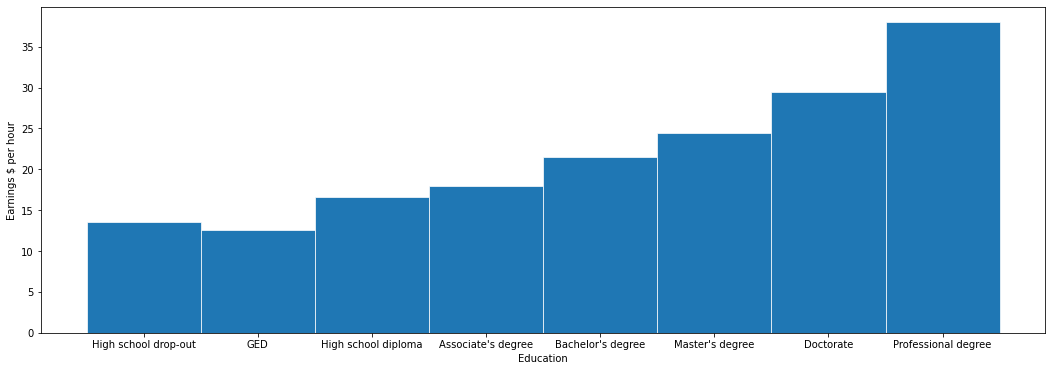

<Figure size 72x72 with 0 Axes>

In [74]:
plt.bar(df_highest_edu.highest_education, df_highest_edu.mean_earnings, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel('Education')
plt.ylabel('Earnings $ per hour')
plt.xticks(df_highest_edu.highest_education, ['High school drop-out', 'GED', "High school diploma", "Associate's degree" ,"Bachelor's degree", "Master's degree", 'Doctorate', 'Professional degree'])
plt.show()

Education has big impact on earnings!

**Average earnings by faith ⛪**

In [68]:
faith = df_data.groupby(['FAITHN', 'FAITHC', 'FAITHJ', 'FAITHP', 'FAITHO', 'FAITHM'], as_index=False).agg(mean=('EARNINGS', 'mean'))

In [77]:
faith_column = faith.columns[:-1][::-1]
faith_mean_column = faith['mean']
df_faith = pd.DataFrame({'faith': faith_column, 'mean_earnings': faith_mean_column})

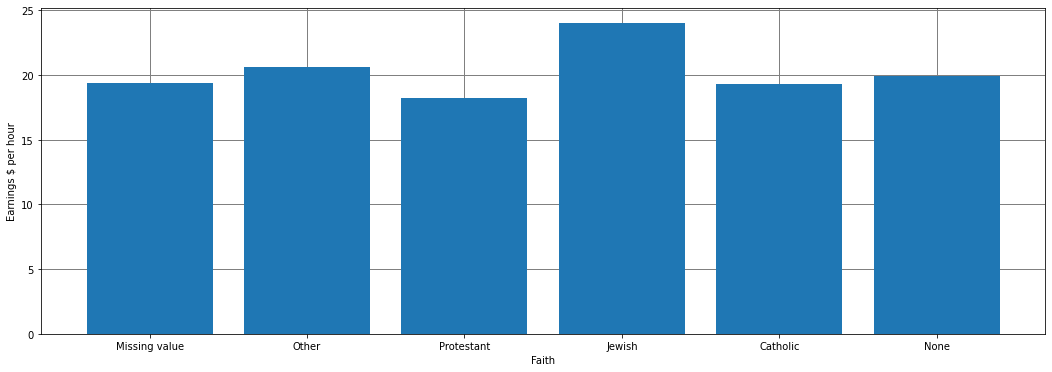

In [87]:
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.bar(df_faith.faith, df_faith.mean_earnings, linewidth=0.5)
plt.xlabel('Faith')
plt.ylabel('Earnings $ per hour')
plt.xticks(df_faith.faith, ['Missing value', 'Other', "Protestant", "Jewish" ,"Catholic", "None"])
plt.show()

**How important was the parents' education in relation to subjects' earnings?**

In [97]:
par_edu = df_data.groupby(['SM', 'SF'], as_index=False).agg(median=('EARNINGS', 'median'))

Using `median` to eliminate effect on outcome by really high earners and really low earners

In [110]:
fig = px.scatter(par_edu, x="SM", y="SF", 
                 size='median', 
                 hover_data=['median', 'SF', 'SM'], 
                 trendline="ols",
                 color='median',
                 labels={
                     "SM": "Years of schooling of biological mother",
                     "SF": "Years of schooling of biological father",
                 },
                 width=800, height=800)
fig.show()

In [108]:
par_edu.corr()

,SM,SF,median
SM,1.00,0.49,0.18
SF,0.49,1.00,0.36
median,0.18,0.36,1.00


**There is very weak correlation between median earning and schooling year of father / mother. But it helps a little!**

**Arithmetic reasoning, word knowledge, paragraph comprehension, math knowledge score (ASVBC4).  How does it effect earnings?** 🧠

In [127]:
ASVABC4 = df_data.groupby(['ASVABC4'], as_index=False).agg(median=('EARNINGS', 'median'))

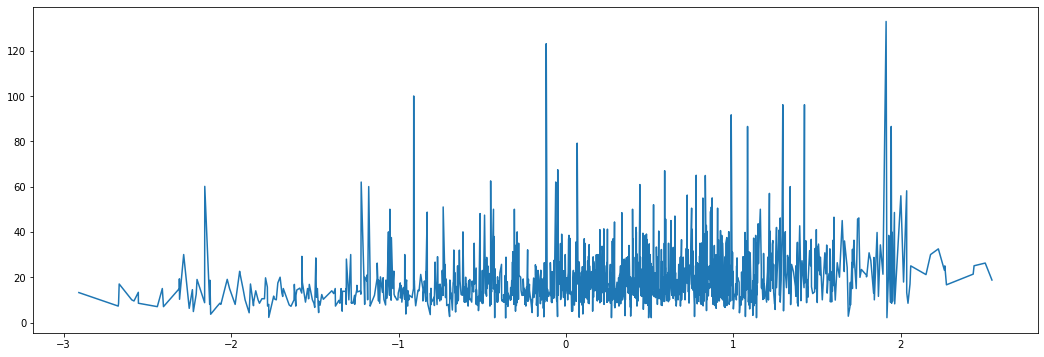

In [150]:
plt.plot(ASVABC4.ASVABC4, ASVABC4['median'])
plt.show()

In [137]:
np.corrcoef(ASVABC4.ASVABC4, ASVABC4['median'])

array([[1.       , 0.2492469],
       [0.2492469, 1.       ]])

**Correlation is weak**

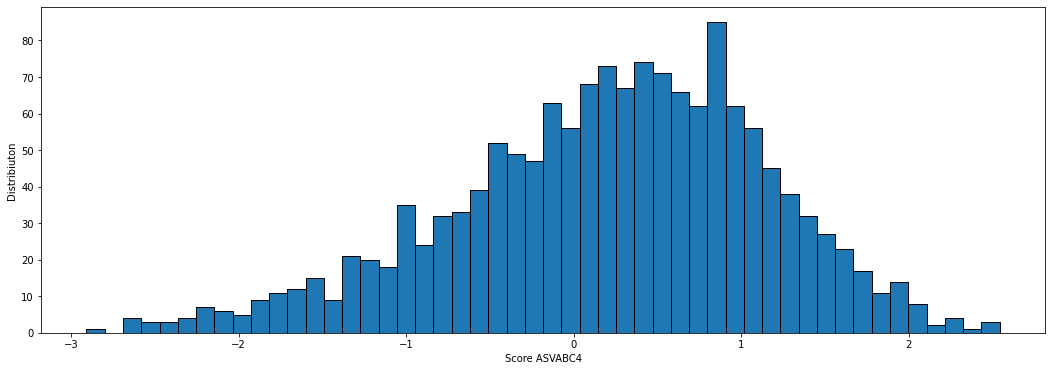

In [206]:
plt.hist(ASVABC4.ASVABC4, bins=50, edgecolor='black')
plt.xlabel('Score ASVABC4')
plt.ylabel('Distribiuton')
plt.show()

**Normal distribiution in scores from 2000 people!**

**What is optimal height for maximum earnings?**

In [247]:
earnings_height = df_data.groupby('HEIGHT', as_index=False).agg(median_earnings=('EARNINGS', 'mean'))

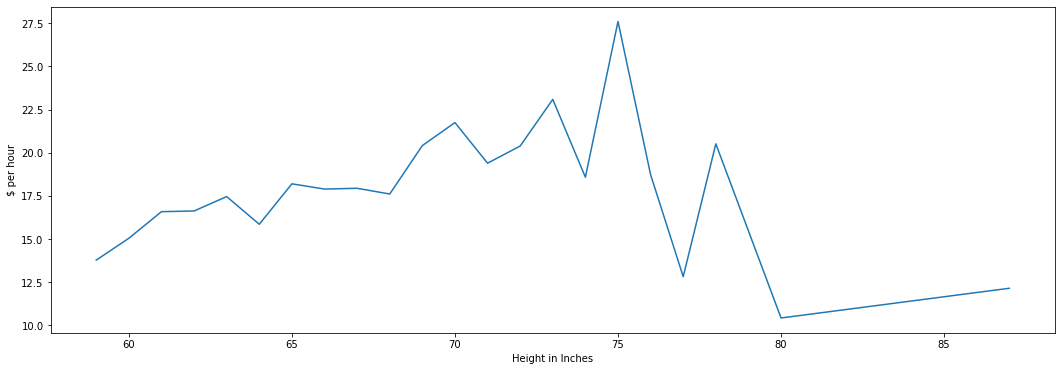

In [250]:
plt.plot(earnings_height.HEIGHT, earnings_height.median_earnings)
plt.xlabel('Height in Inches')
plt.ylabel('$ per hour')
plt.show()

**Looks like the best height is 70 inches so 190 cm!** Intresting is that people taller than that earn less.

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [173]:
df_copy = df_data.copy()

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.loc[:, df_copy.columns != 'EARNINGS'], df_copy.EARNINGS, test_size=0.20, random_state=42)

# Simple Linear Regression

In [176]:
simple_regr = LinearRegression()
simple_regr.fit(pd.DataFrame(X_train.S), y_train)
simple_regr.score(pd.DataFrame(X_train.S), y_train) * 100

8.311636185982573

Our model explains observed data ***8%***. Really small **RSquared**. Years of schooling isn't the predicator of good earnings!

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [245]:
coef_schooling = simple_regr.coef_

In [183]:
print(f'Every additional year of schooling is {coef_schooling[0]:.2}$ per hour more')

Every additional year of schooling is 1.3$ per hour more


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [207]:
predicted_values = simple_regr.predict(pd.DataFrame(X_train.S))
school_residuals = (y_train - predicted_values)
school_residuals.skew()

3.153212888678174

**Skew is high. Asymetry in distribuition is certain. Let's see in what direction!**

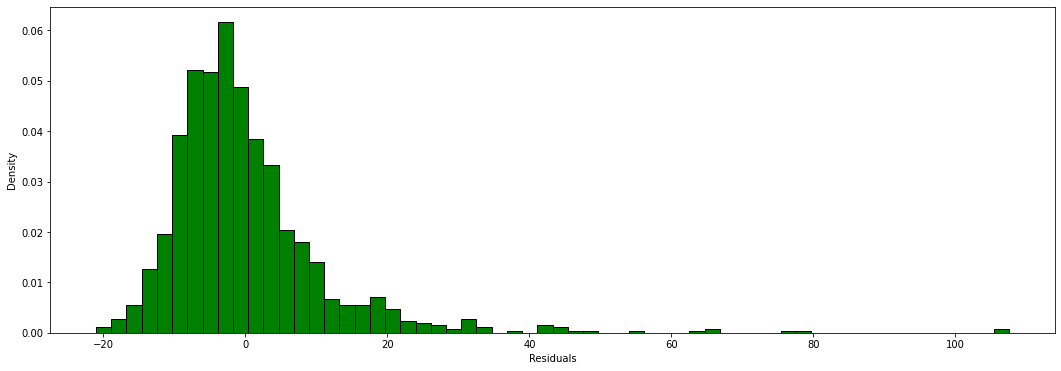

In [231]:
fig, ax1 = plt.subplots()
ax1.hist(school_residuals, bins=60, density=True, color='g', edgecolor='black')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Density')
plt.show()

Our model predicts too big of a earnings

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [226]:
school_plus_exp = pd.DataFrame(X_train.loc[:,['S', 'EXP']])

In [227]:
school_puls_exp_regr = LinearRegression()
school_puls_exp_regr.fit(school_plus_exp, y_train)
school_puls_exp_regr.score(school_plus_exp, y_train) * 100

11.945638211009035

Model explains a ~12% of the data

### Evaluate the Coefficients of the Model

In [228]:
school_puls_exp_regr.coef_

array([1.84331414, 0.98959959])

### Analyse the Estimated Values & Regression Residuals

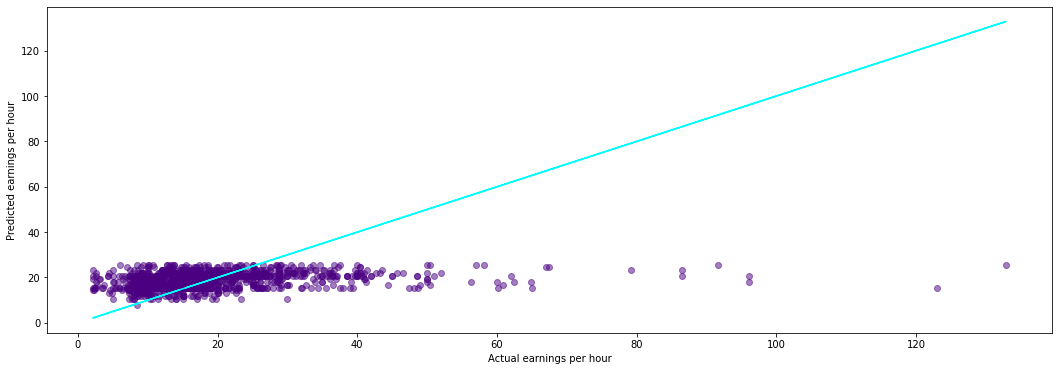

In [234]:
predicted_values_shl_exp = school_puls_exp_regr.predict(school_plus_exp)
residuals = (y_train - predicted_values_shl_exp)

plt.scatter(x=y_train, y=predicted_values, alpha=0.5, color='indigo')
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual earnings per hour')
plt.ylabel('Predicted earnings per hour')
plt.show()

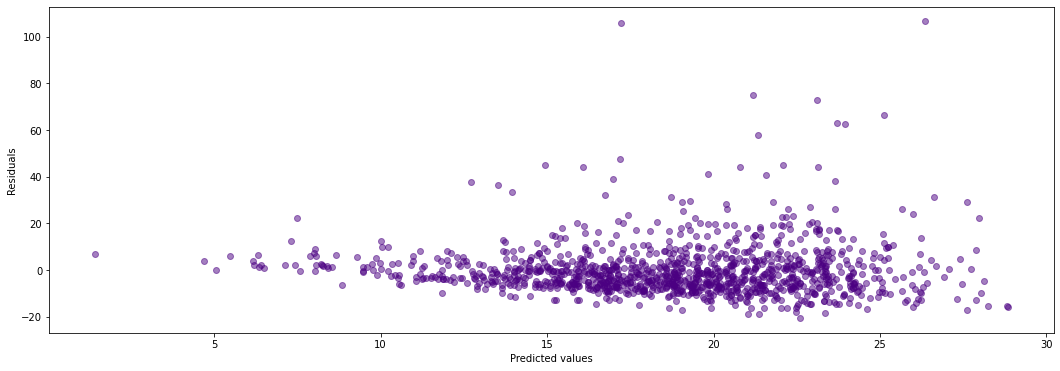

In [235]:
plt.scatter(x=predicted_values_shl_exp, y=residuals, alpha=0.5, color='indigo')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Making a prediction with model

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [238]:
schooling_year = school_puls_exp_regr.coef_[0]
exp_in_work = school_puls_exp_regr.coef_[1]
intercept = school_puls_exp_regr.intercept_

**Making prediction: 16 years o schooling + 5 years work experience**

In [241]:
print(f'This person would earn: {intercept + schooling_year * 16 + exp_in_work * 5:.3}$ per hour')

This person would earn: 19.8$ per hour


# Making the best possible model 🙏


We need to fill NaNs with `median` of a column!

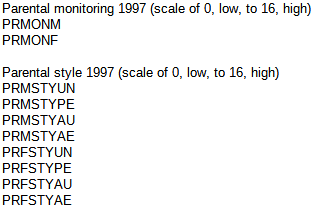

In [345]:
df_best = df_data.copy()

In [346]:
df_best = df_best.fillna(df_best.median())

In [347]:
df_best.isna().values.any()

False

# **Ok time to make it**

In [348]:
X_train, X_test, y_train, y_test = train_test_split(df_best.loc[:, df_best.columns != 'EARNINGS'], df_best.EARNINGS, test_size=0.20, random_state=42)

In [349]:
best_regr = LinearRegression()
best_regr.fit(X_train, y_train)
best_regr.score(X_train, y_train) * 100

29.987944603690043

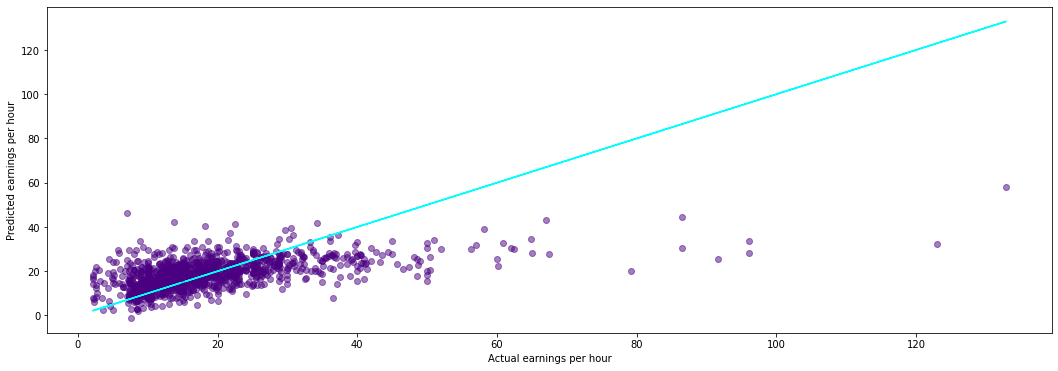

In [350]:
predicted_values_best = best_regr.predict(X_train)
residuals_best = (y_train - predicted_values_best)

plt.scatter(x=y_train, y=predicted_values_best, alpha=0.5, color='indigo')
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual earnings per hour')
plt.ylabel('Predicted earnings per hour')
plt.show()

**Model isn't that good. Let's check if normalization will help**

In [352]:
X_train.drop('RS97UNKN', axis=1, inplace=True)

In [353]:
X_train.drop('MSA11NIC', axis=1, inplace=True)

In [354]:
X_train.isnull().sum().sort_values(ascending=False)

ID          0
VERBAL      0
SIBLINGS    0
SMR         0
SFR         0
           ..
EDUCGED     0
EDUCHSD     0
EDUCAA      0
EDUCBA      0
MSA11NK     0
Length: 93, dtype: int64

In [355]:
X_train = X_train  / X_train.abs().max()

In [358]:
best_regr = LinearRegression()
best_regr.fit(X_train, y_train)
best_regr.score(X_train, y_train) * 100

29.943945360411394

**Our model became slightly worse after normlalization. Turns out it didn't help**

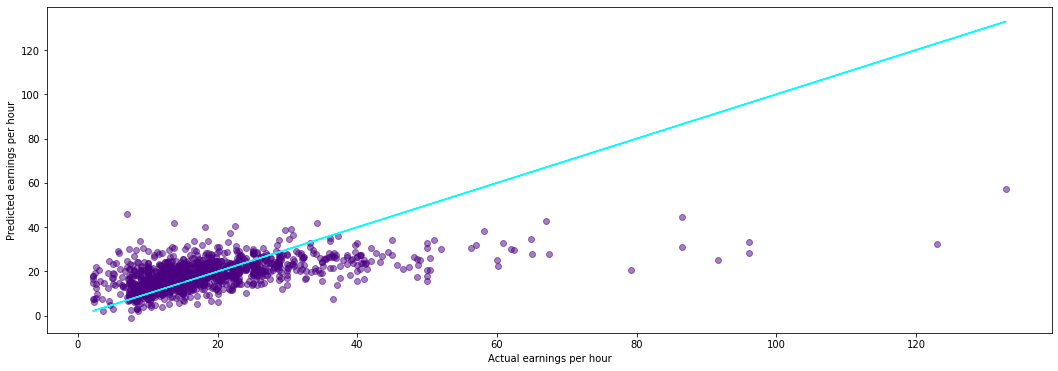

In [357]:
predicted_values_best = best_regr.predict(X_train)
residuals_best = (y_train - predicted_values_best)

plt.scatter(x=y_train, y=predicted_values_best, alpha=0.5, color='indigo')
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual earnings per hour')
plt.ylabel('Predicted earnings per hour')
plt.show()